In [61]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
import pickle
from sklearn.model_selection import train_test_split
import umap
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import time
from scipy.stats import poisson
from sklearn import metrics
# Define functions to generate the data
def CircleDist(a, b):
    dx = abs(a - b)
    dx = np.minimum(dx, 2 * np.pi - dx)
    return dx

def gaussian_walk_on_circle(start, T, sigma):
    walk = np.zeros(T)
    walk[0] = start
    for i in range(1, T):
        increment = np.random.normal(0, sigma)  # Generate a Gaussian increment
        walk[i] = (walk[i - 1] + increment) % (2 * np.pi)  # Wrap around the circle
    return walk

def makehddata(N, T):
    h = 0.1
    beta0 = 20
    beta_and_h = (beta0 / h)
    sigma = np.pi 
    # Starting point for Gaussian walks
    start1 = np.random.uniform(0, 2 * np.pi)
    start2 = np.random.uniform(0, 2 * np.pi)
    # Generate Gaussian walks
    hd_sim = np.array([gaussian_walk_on_circle(start1, T, sigma/10),
                       gaussian_walk_on_circle(start2, T, sigma/10)])
    rf_hd1 = np.random.uniform(0, 2 * np.pi, size=(int(N)))
    rf_hd2 = np.random.uniform(0, 2 * np.pi, size=(int(N)))
    S = np.zeros((N, T))

    for i in range(int(N)):
        for t in range(T):
            dist1 = CircleDist(rf_hd1[i], hd_sim[0, t])
            dist2 = CircleDist(rf_hd2[i], hd_sim[1, t])

            if i < 50:
                response = np.log(h) + (np.log(beta_and_h)) * np.exp(-dist1**2 / (2 * sigma**2))
            else:
                response = np.log(h) + (np.log(beta_and_h)) * np.exp(-dist2**2 / (2 * sigma**2))

            S[i, t] = np.random.poisson(lam=np.exp(response))

    rf_hd = (rf_hd1, rf_hd2)
    return hd_sim, S, rf_hd

# Simulate the data
T = 3000
N = 200
hd_sim, S, rf_hd = makehddata(N, T)



c:\Users\MASTERKILLERLORDKING\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


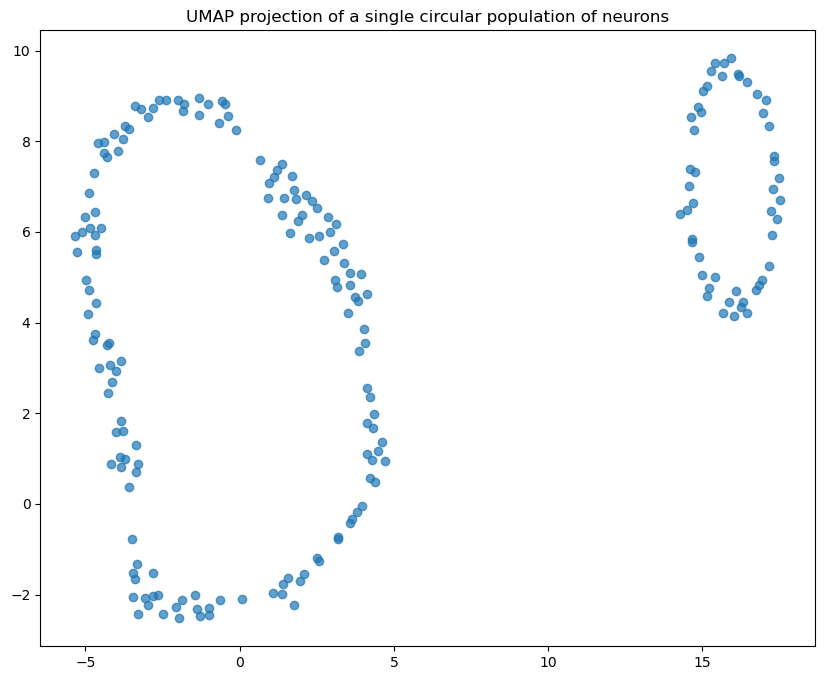

In [68]:
umap_reducer = umap.UMAP(n_neighbors=10, min_dist=0.5, n_components=2, metric='euclidean', random_state=42)
S_flattened = S.reshape(S.shape[0], -1)
embedding = umap_reducer.fit_transform(S_flattened)

# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.7)
plt.title('UMAP projection of a single circular population of neurons')
plt.show()

In [63]:
#SINGULAR CIRCLES:


def makehddata_single_circle(N, T):
    h = 0.1
    beta0 = 20
    beta_and_h = (beta0 / h)
    sigma = np.pi
    # Starting point for Gaussian walks
    start = np.random.uniform(0, 2 * np.pi)
    # Generate Gaussian walk
    hd_sim = gaussian_walk_on_circle(start, T, sigma/10)
    rf_hd = np.random.uniform(0, 2 * np.pi, size=(int(N)))
    S = np.zeros((N, T))

    for i in range(int(N)):
        for t in range(T):
            dist = CircleDist(rf_hd[i], hd_sim[t])
            response = np.log(h) + (np.log(beta_and_h)) * np.exp(-dist**2 / (2 * sigma**2))
            S[i, t] = np.random.poisson(lam=np.exp(response))

    return hd_sim, S, rf_hd

# Simulate the data
T = 3000
N = 200
hd_sim1, S1, rf_hd1 = makehddata_single_circle(N, T)
hd_sim2, S2, rf_hd2 = makehddata_single_circle(N, T)




c:\Users\MASTERKILLERLORDKING\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


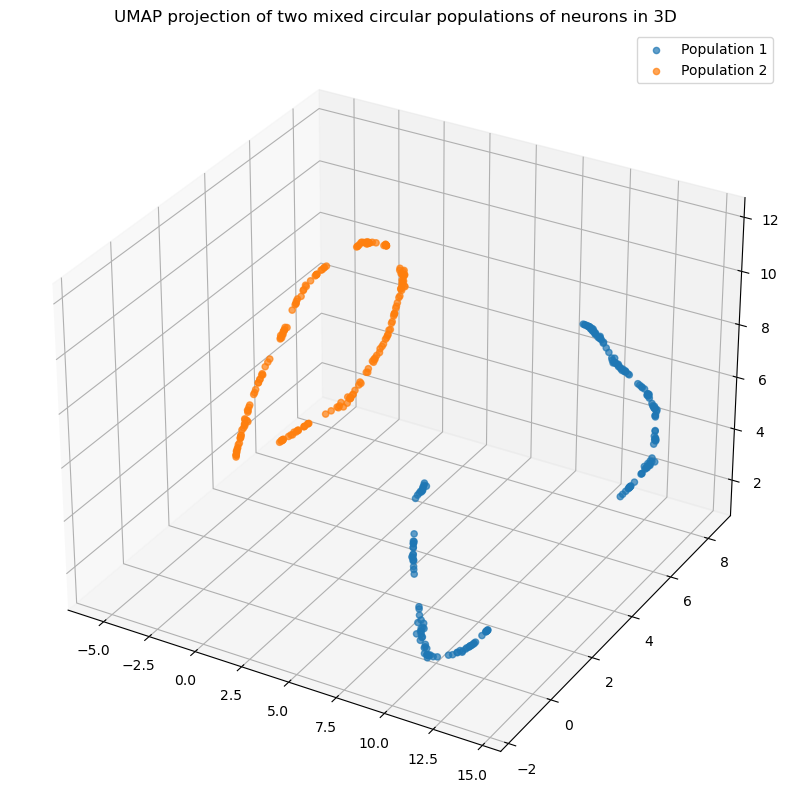

In [64]:
S_combined = np.vstack((S1, S2))

# Create labels for the populations
labels = np.array([0] * N + [1] * N)

# Use UMAP to reduce dimensionality for visualization
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=3, metric='euclidean', random_state=42)
S_combined_flattened = S_combined.reshape(S_combined.shape[0], -1)
embedding = umap_reducer.fit_transform(S_combined_flattened)

# Plot the results in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embedding[labels == 0, 0], embedding[labels == 0, 1], embedding[labels == 0, 2], label='Population 1', alpha=0.7)
scatter = ax.scatter(embedding[labels == 1, 0], embedding[labels == 1, 1], embedding[labels == 1, 2], label='Population 2', alpha=0.7)
ax.set_title('UMAP projection of two mixed circular populations of neurons in 3D')
ax.legend()
plt.show()

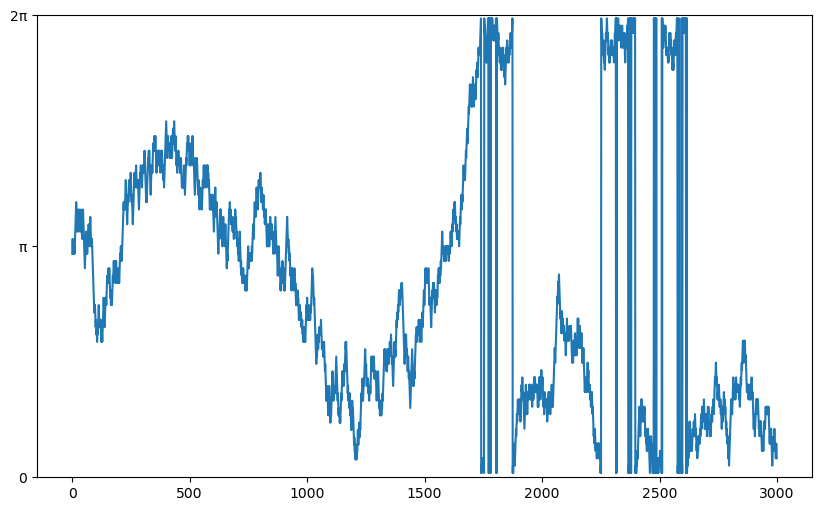

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_steps = 3000  # Number of steps in the random walk
step_size = 0.1  # Size of each step

# Generate random walk
np.random.seed(2)  # For reproducibility
steps = np.random.choice([-step_size, step_size], size=num_steps)
random_walk = np.cumsum(steps)
random_walk = np.pi + random_walk
# Wrap the values between 0 and 2pi
random_walk = np.mod(random_walk, 2 * np.pi)

# Plotting the random walk
plt.figure(figsize=(10, 6))
plt.plot(random_walk)
# plt.xlabel('Step')
# plt.ylabel('Value')
#plt.title('Random Walk between 0 and 2π')
plt.ylim(0, 2 * np.pi)
plt.yticks([0, np.pi, 2 * np.pi], ['0', 'π', '2π'])
plt.show()



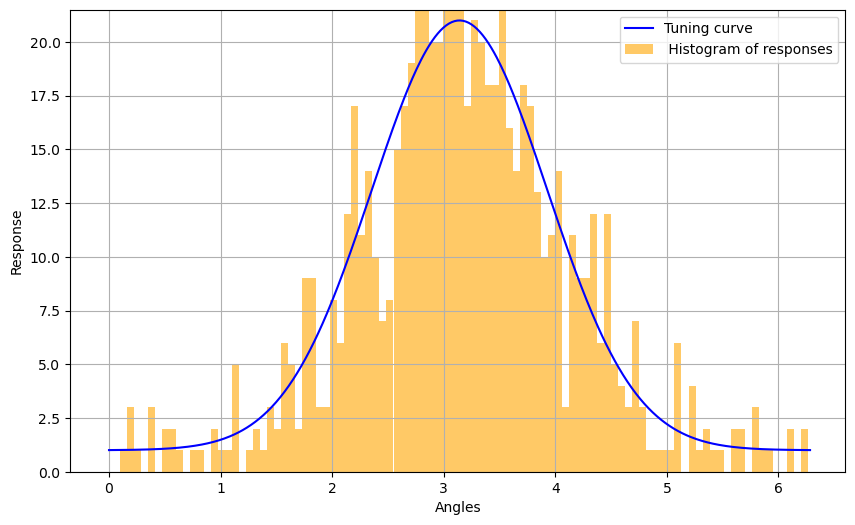

In [29]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1001)

mu = np.pi
sigma = np.pi/4
weight = 20
constant = 1

# Create grid for one-dimensional Gaussian
x = np.linspace(0, 2*np.pi, 500)
gaussian = weight * np.exp(-(x - mu)**2 / (2 * sigma**2)) + constant

# Generate Poisson-distributed data using the Gaussian curve values as the rate parameter
poisson_data = np.random.poisson(lam=gaussian)

# Select every 5th value for the histogram
x_hist = x[::5]
poisson_data_hist = poisson_data[::5]

# Plot the Gaussian-like curve in one dimension with y-axis starting from zero
plt.figure(figsize=(10, 6))
plt.plot(x, gaussian, label='Tuning curve', color='blue')
#plt.title('Gaussian-like Curve with Poisson-Distributed Histogram (Every 5th Value)')
plt.xlabel('Angles')
plt.ylabel('Response')
plt.ylim(0, np.max(gaussian) + 0.5)  # Ensure y-axis starts from zero and extends to max value plus some padding
plt.legend()
plt.grid(True)

# Add a histogram of the Poisson-distributed data (every 5th value)
plt.bar(x_hist, poisson_data_hist, width=(2*np.pi/100), alpha=0.6, color='orange', label=' Histogram of responses')
plt.legend()
plt.show()

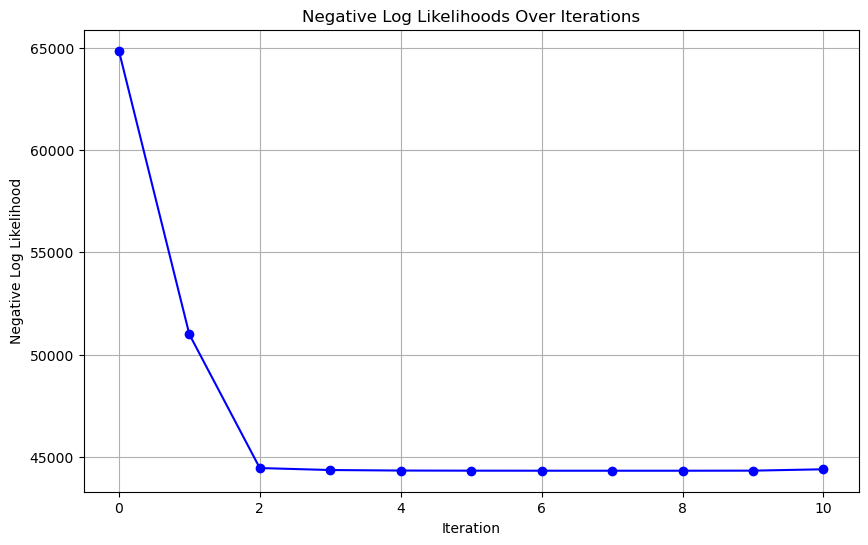

In [1]:
import matplotlib.pyplot as plt

# Data from the runs
log_likelihoods = [
    64844.12395189014,
    50994.635876477056,
    44464.00927274605,
    44367.46303966567,
    44342.17235672272,
    44336.033665798364,
    44333.80494989741,
    44333.40547362045,
    44333.463102992304,
    44337.10391431197,
    44403.779422884545  # Final negative log likelihood
]

# Plot the negative log likelihoods
plt.figure(figsize=(10, 6))
plt.plot(log_likelihoods, marker='o', linestyle='-', color='blue')
plt.title('Negative Log Likelihoods Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Negative Log Likelihood')
plt.grid(True)
plt.show()

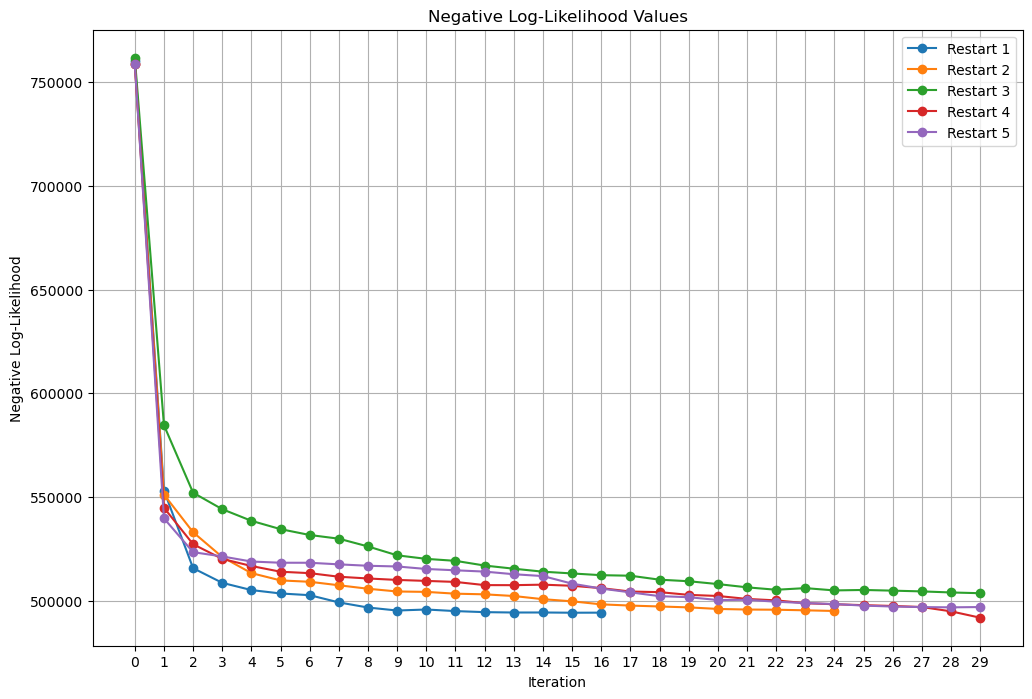

In [6]:
import matplotlib.pyplot as plt

# Data for negative log-likelihood values for each restart
restart_1 = [
    760428.983158, 553112.170185, 515686.671362, 508609.976841, 505125.733864, 
    503488.242024, 502662.145876, 499173.977680, 496708.955641, 495264.457228,
    495755.864664, 494989.184479, 494483.750034, 494304.076777, 494316.959157,
    494204.232307, 494238.162134
]
restart_2 = [
    759011.070942, 551174.219428, 533015.796103, 521055.966419, 513297.863414,
    509784.409226, 509124.474915, 507439.775856, 505765.189988, 504444.104247,
    504251.194245, 503384.369051, 503072.967561, 502261.461206, 500724.823817,
    499703.180930, 498237.887553, 497648.124071, 497213.862135, 496778.366203,
    496025.802121, 495735.417288, 495652.470595, 495362.680632, 495043.235205
]
restart_3 = [
    761840.784930, 584626.870909, 552065.012571, 544120.403481, 538522.705198,
    534503.716319, 531683.577457, 529901.142832, 526154.800416, 521881.973828,
    520171.552529, 519219.418082, 516950.771295, 515429.474007, 513994.544593,
    513140.446377, 512305.043816, 512049.737282, 510134.060965, 509389.883491,
    508016.268871, 506445.893260, 505279.324265, 506068.160854, 504958.159410,
    505182.322974, 504847.875897, 504483.361908, 503973.615741, 503611.090532
]
restart_4 = [
    758735.651883, 544827.042207, 527239.764213, 520167.717197, 516730.707583,
    513971.476990, 513284.631530, 511558.578758, 510714.868402, 510017.882413,
    509544.429533, 509055.706626, 507519.176473, 507491.088354, 507737.180774,
    507198.220953, 506057.271734, 504414.787682, 504128.398083, 502817.756704,
    502276.088103, 500861.185366, 500149.567707, 498791.083691, 498292.093825,
    497847.703027, 497461.487352, 496943.452573, 494865.357383, 491792.552286
]
restart_5 = [
    758636.194508, 539703.872749, 523398.832105, 521342.273286, 518889.571753,
    518307.948991, 518295.604873, 517525.188803, 516843.819498, 516508.213688,
    515296.531591, 514662.384864, 514037.703352, 512761.805315, 511875.073494,
    508220.628742, 505848.482512, 504010.027095, 502198.742924, 501690.852546,
    500328.582729, 500435.282815, 499513.915903, 498853.521870, 498377.793383,
    497633.847079, 497188.256189, 496919.595336, 496802.505147, 496940.070153
]

# Plotting the negative log-likelihood values
plt.figure(figsize=(12, 8))

plt.plot(restart_1, marker='o', label='Restart 1')
plt.plot(restart_2, marker='o', label='Restart 2')
plt.plot(restart_3, marker='o', label='Restart 3')
plt.plot(restart_4, marker='o', label='Restart 4')
plt.plot(restart_5, marker='o', label='Restart 5')

plt.xlabel('Iteration')
plt.ylabel('Negative Log-Likelihood')
plt.title('Negative Log-Likelihood Values')
plt.legend()
plt.grid(True)
plt.xticks(range(max(len(restart_1), len(restart_2), len(restart_3), len(restart_4), len(restart_5))))  # Set x-axis to show whole values

plt.show()
